In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Calculate confidence intervals using Z procedure

formula is 
$$CI = \text {Point Estimate} \pm \text{Margin of Error}$$

where margin of error is 

$$Z_{critical} \times \text{Standard Error}$$

and the formula for standard error is $\dfrac{\sigma}{\sqrt {n}}$

In [11]:
upper_bounds = []
lower_bounds = []
colors = []

pop_mean = 50
pop_std = 15
confidence_level = 0.95
area = (1 + confidence_level)/2


for i in range(50):
    normal = np.random.normal(loc=pop_mean,scale=pop_std,size=100)
    sample_mean = np.mean(normal)
    z_critical = stats.norm.ppf(area)
    standard_error = pop_std / np.sqrt(100)
    
    upper_bound = sample_mean + (z_critical * standard_error)
    lower_bound = sample_mean - (z_critical * standard_error)
    
    upper_bounds.append(upper_bound)
    lower_bounds.append(lower_bound)
    
    if lower_bound <= pop_mean <= upper_bound:
        color = 'blue'
        colors.append(color)
    else:
        color = 'orange' 
        colors.append(color)

count_orange = colors.count('orange')

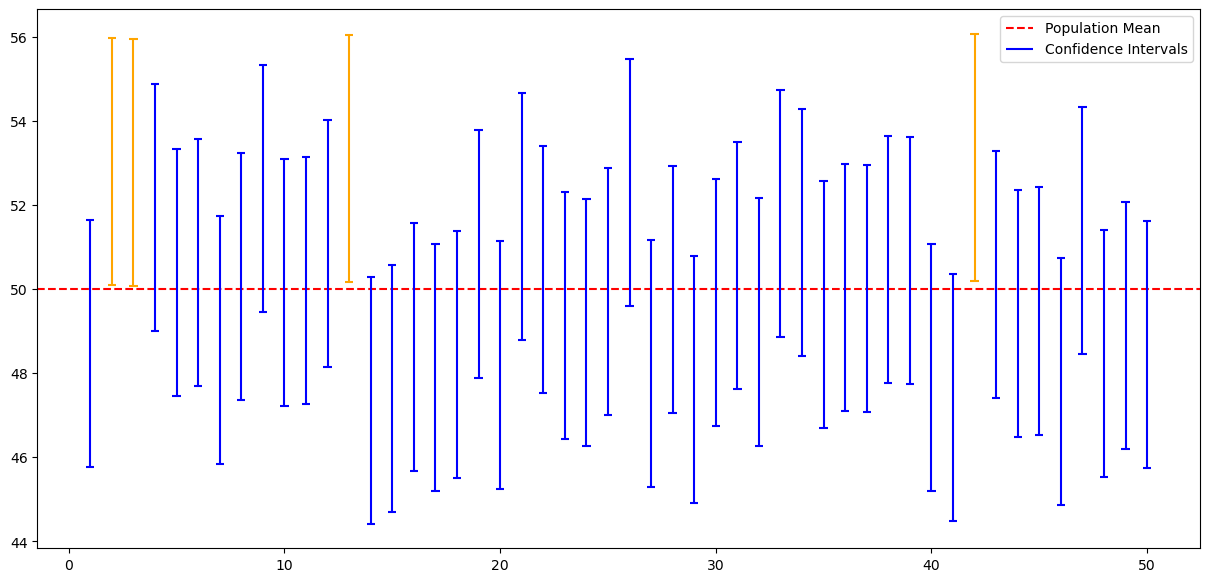

In [20]:
# plot the graph

fig = plt.figure(figsize=(15,7))

plt.axhline(y=pop_mean,linestyle='--',color='red',label='Population Mean')
plt.vlines(x=np.arange(1,51,1),ymin=lower_bounds,ymax=upper_bounds,colors=colors,label='Confidence Intervals')
plt.scatter(x=np.arange(1,51,1),y=upper_bounds,c=colors,marker='_')
plt.scatter(x=np.arange(1,51,1),y=lower_bounds,c=colors,marker='_')
plt.legend()
plt.show()

### Effect of sample size on margin of error

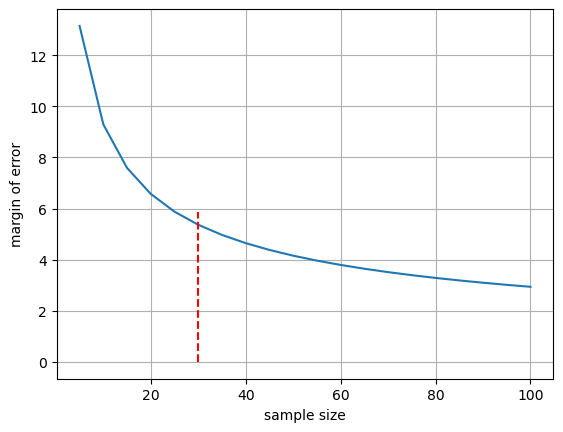

In [28]:
sample_sizes = np.arange(5,105,5)

z_critical = 1.96

moe = z_critical * (pop_std / np.sqrt(sample_sizes))

# plot the graph
plt.plot(sample_sizes,moe)
plt.xlabel('sample size')
plt.ylabel('margin of error')
plt.vlines(x=sample_sizes[sample_sizes == 30],ymin=0,ymax=moe[sample_sizes == 30] + 0.5,linestyles='dashed',color='red')
plt.grid()
plt.show()

**The value of 30 is considered critical because till 30 the margin of error reduces dastically and then it stops to decrease that much with increasing sample sizes**

### Effect of population standard deviation on margin of error

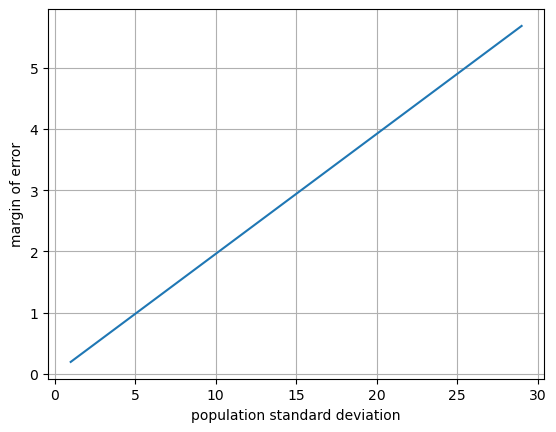

In [33]:
pop_stds = np.arange(1,30,1)

z_critical = 1.96

moe = z_critical * (pop_stds / np.sqrt(100))

# plot the graph
plt.plot(pop_stds,moe)
plt.xlabel('population standard deviation')
plt.ylabel('margin of error')
plt.grid()
plt.show()

**The margin of error increases exponentially with increased population standard deviation because an increased population standard deviation increases the variability in data which results in increased variability in sample means hence the increase in margin of error to estimate the true population parameter** 

### Effect of confidence level on margin of error

In [40]:
pop_mean = 50
pop_std = 15
n = 100

confidence_levels = np.arange(30,105,1)

z_critical = stats.norm.ppf(((confidence_levels + 100)/100)/2)



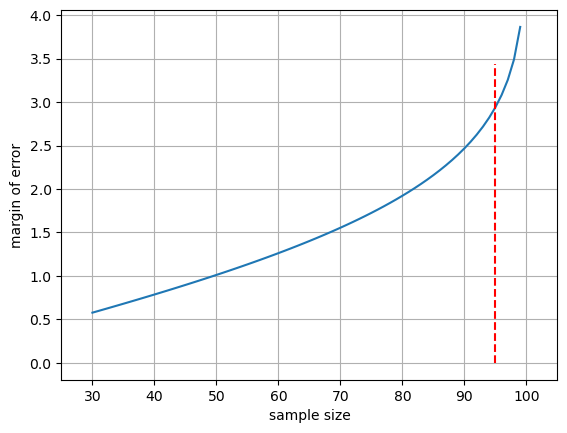

In [41]:
moe = z_critical * (pop_std / np.sqrt(n))

# plot the graph
plt.plot(confidence_levels,moe)
plt.xlabel('sample size')
plt.ylabel('margin of error')
plt.vlines(x=confidence_levels[confidence_levels == 95],ymin=0,ymax=moe[confidence_levels == 95] + 0.5,linestyles='dashed',color='red')
plt.xlim(25,105)
plt.grid()
plt.show()

In [38]:
moe

array([0.5779807 , 0.68064329, 0.78660077, 0.89664019, 1.01173463,
       1.13312254, 1.26243185, 1.40188394, 1.55465008, 1.72552407,
       1.92232735, 2.15929721, 2.46728044, 2.93994598,        inf])

**The margin of error increases exponentially after the 95% confidence level mark**